## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
np.seterr(divide = 'ignore') 
np.random.seed(42)

print("Import Successful")

Import Successful


## Loading Dataset

* Temperature (0 - 50 degC) using DHT11 Temp. and Humidity Sensor
* Humidity (20 - 90% Rh)
* Smoke Sensor (detects CO in air and outputs equivalent voltage 10 - 10,000 ppm) MQ7 Sensor

In [2]:
ff_data = pd.read_csv(r"C:\Users\shash\Desktop\datasets\forest.csv")
print(ff_data.head())
ff_data.describe()

   Temperature   Humidity       Smoke ForestFire
0    58.304492  83.397985  346.893995        yes
1    29.099555  28.743238  274.974456         no
2    67.379053  75.673938  474.857040        yes
3    39.398075   2.974414  496.890775         no
4    40.008351  10.911680   72.361935         no


,Temperature,Humidity,Smoke
count,100.000000,100.000000,100.000000
mean,50.684229,47.671505,268.805125
std,27.893418,28.786516,149.420728
min,1.431168,0.110416,4.764925
25%,25.279107,23.235046,168.031499
50%,52.975962,49.018216,268.438855
75%,74.055454,73.263706,399.006685
max,98.664574,99.077992,497.545610


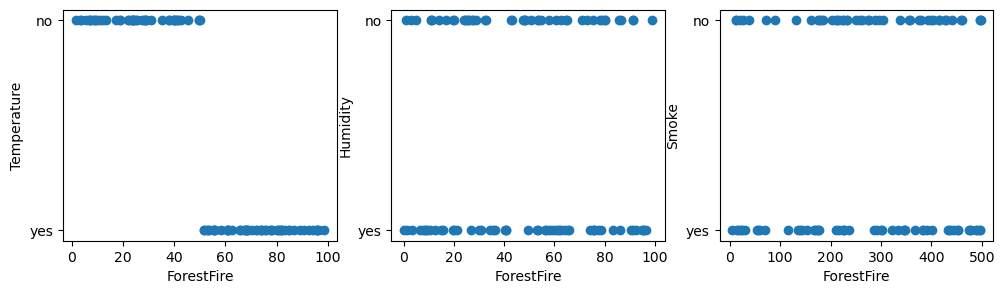

In [3]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(ff_data['Temperature'],ff_data['ForestFire'])
plt.xlabel("ForestFire")
plt.ylabel("Temperature")
plt.subplot(1,3,2)
plt.scatter(ff_data['Humidity'],ff_data['ForestFire'])
plt.xlabel("ForestFire")
plt.ylabel("Humidity")
plt.subplot(1,3,3)
plt.scatter(ff_data['Smoke'],ff_data['ForestFire'])
plt.xlabel("ForestFire")
plt.ylabel("Smoke")
plt.show()

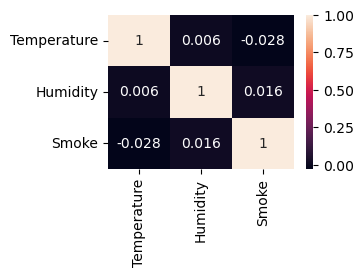

In [4]:
plt.figure(figsize=(3,2))
sns.heatmap(ff_data.corr(),annot=True)
X = ff_data.drop(['ForestFire'],axis=1)
y = ff_data['ForestFire']
#X.drop(["Humidity","Smoke"],inplace=True,axis=1)

## Data Cleaning and Model training

In [5]:
ff_data['ForestFire'] = ff_data['ForestFire'].replace({"yes":1,"no":0})

In [6]:
SS = StandardScaler()
X_scaled = SS.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y)

In [7]:
model = LogisticRegression()
model.fit(X_train,y_train)
print(f"Training Data Accuracy : {model.score(X_train,y_train)*100} %")
y_pred = model.predict(X_test)
print(f"Test Data Accuracy : {model.score(X_test,y_test)*100} %")

Training Data Accuracy : 96.0 %
Test Data Accuracy : 100.0 %


In [8]:
confusion_mat = confusion_matrix(y_test,y_pred)
pd.DataFrame(confusion_mat,index=["Yes","No"],columns=["Yes","No"])

,Yes,No
Yes,10,0
No,0,15
